# Лабораторная работа №1
## Реализация алгоритма линейной регрессии на Python
### Гончаров Ян

#### Задание:

0.	Исходные данные представляют собой CSV файл с двумя столбцами
1.	Реализовать чтение данных из файла
2.	Вывести статистическую информацию о используемых данных (количество, min, max, среднее) по каждому из столбцов
3.	Используя библиотеку Matplotlib вывести изображение исходных точек
4.	Реализовать алгоритм метода наименьших квадратов и вычислить параметры регрессионной прямой.
5.	Используя библиотеку Matplotlib и полученное в п.3 изображение отрисовать на изображении другим цветом полученную прямую
6.	Используя полученное в п.4 изображение, отрисовать и заштриховать квадраты ошибок
Общие замечания: программа должна позволять работать с другими входными файлами, программа должна позволять выбрать какой из входных столбцов выбрать в качестве Х а какой в качестве У, по завершению программы должны одновременно видны все 3 изображения (п.2, п.4, п.5)


### Реализовать чтение данных из файла

In [4]:
import pandas as pd

data = pd.read_csv("student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Вывести статистическую информацию о используемых данных (количество, min, max, среднее) по каждому из столбцов

In [5]:
print("Values count:\n", data.count(), "\n")
print("Max values:\n", data.min(), "\n")
print("Min values:\n", data.max(), "\n")
print("Mean values:\n", data.mean(), "\n")

Values count:
 Hours     25
Scores    25
dtype: int64 

Max values:
 Hours      1.1
Scores    17.0
dtype: float64 

Min values:
 Hours      9.2
Scores    95.0
dtype: float64 

Mean values:
 Hours      5.012
Scores    51.480
dtype: float64 



### Используя библиотеку Matplotlib вывести изображение исходных точек

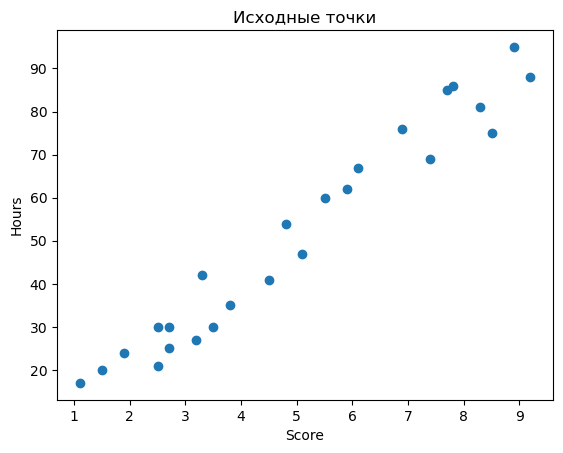

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=data["Hours"], y=data["Scores"])

plt.title("Исходные точки")
plt.ylabel("Hours")
plt.xlabel("Score")

plt.show()

### Реализовать алгоритм метода наименьших квадратов и вычислить параметры регрессионной прямой.

In [7]:
x = data["Hours"]
y = data["Scores"]

count = (x+y).count()

# Угловой коэффициент или градиент оценённой линии. Она представляет собой величину, на которую y увеличивается в среднем, если мы увеличиваем x на одну единицу
b = ((((x*y).sum()) / count) - ((x.sum() * y.sum()) / count**2) ) / (((x**2).sum() / count) - (x.sum() / count)**2)

# Свободный член (пересечение) линии оценки. Это значение y, когда x=0
a = (y.sum() / count) - b * (x.sum() / count)

print('Параметры регрессионной прямой: ')
print("A: ", a)
print("B: ", b)

Параметры регрессионной прямой: 
A:  2.4836734053732528
B:  9.775803390787459


### Используя библиотеку Matplotlib и полученное в п.3 изображение отрисовать на изображении другим цветом полученную прямую

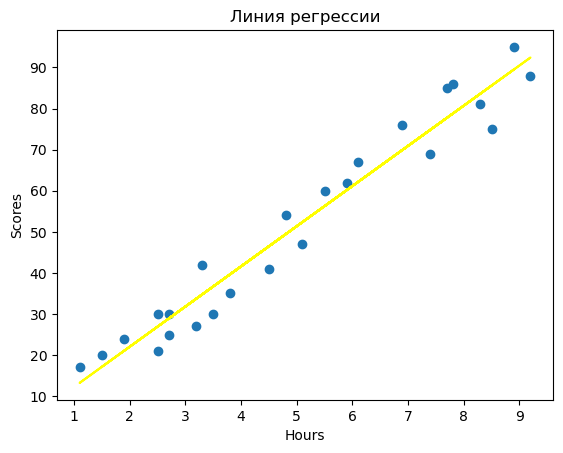

In [8]:
f = lambda x: b*x + a

plt.scatter(x=data["Hours"], y=data["Scores"])
plt.plot(x, f(x), color = 'Yellow')

plt.title("Линия регрессии")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

### Используя полученное в п.4 изображение, отрисовать и заштриховать квадраты ошибок

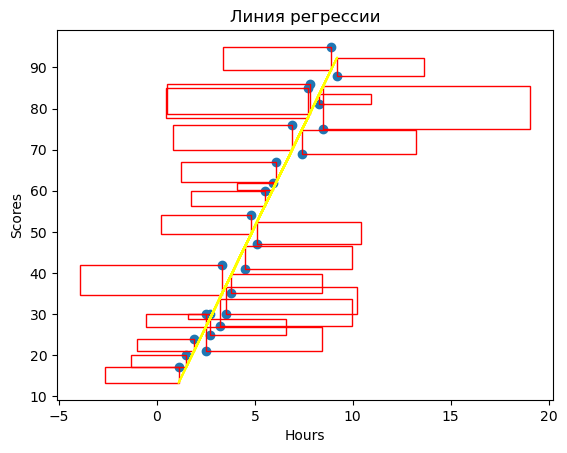

In [9]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

ax.scatter(x=data["Hours"], y=data["Scores"])
ax.plot(x, f(x), color = 'Yellow')

for i in range(count):
    ax.add_patch(
        patches.Rectangle(
            (x[i], f(x)[i]),
            (f(x[i]) - y[i]),
            -(f(x[i]) - y[i]),
            edgecolor = 'red',
            fill = False,
        )
    )

ax.set_title("Линия регрессии")
ax.set_xlabel("Hours")
ax.set_ylabel("Scores")

plt.show()